In [1]:
import keras
import numpy as np
import librosa
model=keras.models.load_model('model.h5')
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc
mfcc=extract_mfcc('test.wav')
mfcc=mfcc.reshape(1,40,1)

In [5]:
mfcc

array([[[-4.6827075e+02],
        [ 1.2173546e+02],
        [ 2.3662453e+01],
        [-2.8561356e+01],
        [ 1.2879642e+00],
        [ 9.3539028e+00],
        [-3.2251813e+00],
        [-4.0723310e+00],
        [-1.4063217e+01],
        [ 2.3343626e-01],
        [-1.4967822e+01],
        [-2.5570240e+00],
        [-4.0995331e+00],
        [-5.5415001e+00],
        [ 4.9344859e-01],
        [-1.1360227e-01],
        [-2.2609453e-01],
        [ 6.4170709e+00],
        [ 1.5050904e+00],
        [-7.7693977e+00],
        [-5.9304457e-02],
        [ 3.1311240e+00],
        [-3.9861727e-01],
        [ 5.4739370e+00],
        [-7.8829271e-01],
        [ 4.8397207e+00],
        [ 2.4012091e+00],
        [ 8.2452374e+00],
        [-2.3619974e+00],
        [ 5.6738911e+00],
        [-5.0520682e-01],
        [ 4.7644157e+00],
        [ 4.7915902e+00],
        [ 2.5002677e+00],
        [ 2.2020783e+00],
        [ 6.7344217e+00],
        [ 6.9633043e-01],
        [ 3.2858422e+00],
        [ 5.

In [20]:
for i in model.predict(mfcc):
    res=np.argmax(i)
    dict={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'ps':5,'sad':6}
    value = [i for i in dict if dict[i]==res]
    output=value[0]
    print(output)

1/1 [==============================] - 0s 24ms/step
happy


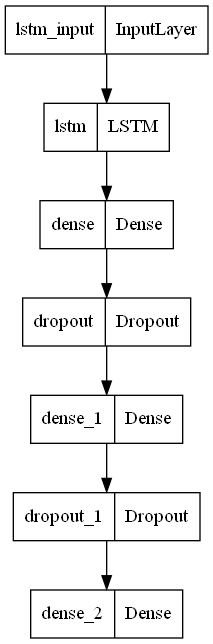

In [3]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

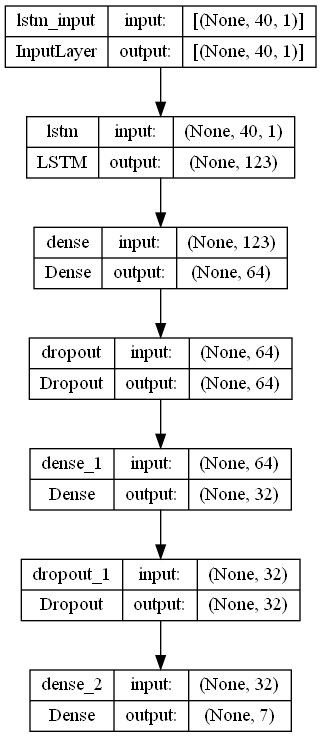

In [4]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)